### The simulation was run with only one seed for the random generator.

In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

import particles

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [65]:
time_limit_ix = 818 

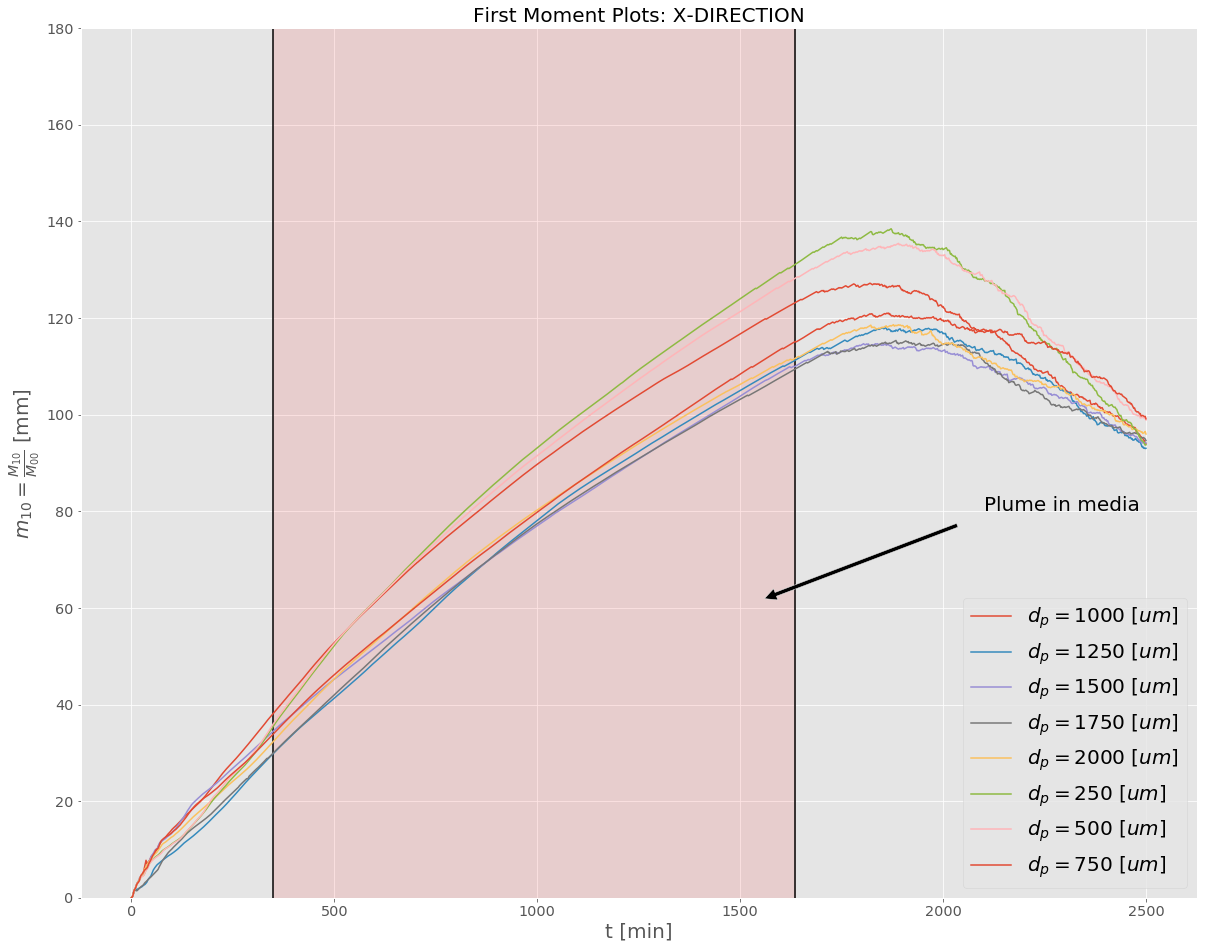

In [66]:
data_direction = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m1x/'


files = [data_direction+f for f in os.listdir(data_direction)]
files

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files]
diameters

fig, ax = plt.subplots()

for i, f in enumerate(files[:]):
    df=pd.read_csv(f,index_col=0)
    df.mean(axis=1).plot(label=r'$d_p=$'+diameters[i]+r' $[um]$',ax=ax)
plt.xlabel('t [min]', fontsize=20)
plt.ylabel(r'$m_{10}=\frac{M_{10}}{M_{00}}$ [mm]', fontsize=20)
plt.title(r'First Moment Plots: X-DIRECTION', fontsize=20)
plt.legend(fontsize=20)
ymax, ymin=180,0
xmax, xmin=2500, 350
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=df.index[time_limit_ix])
plt.axvspan(xmin, df.index[time_limit_ix],  alpha=0.1, color='red')
plt.annotate('Plume in media', xy=(1500, 60), xytext=(2100, 80),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20);

In [67]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_mom_x.png')

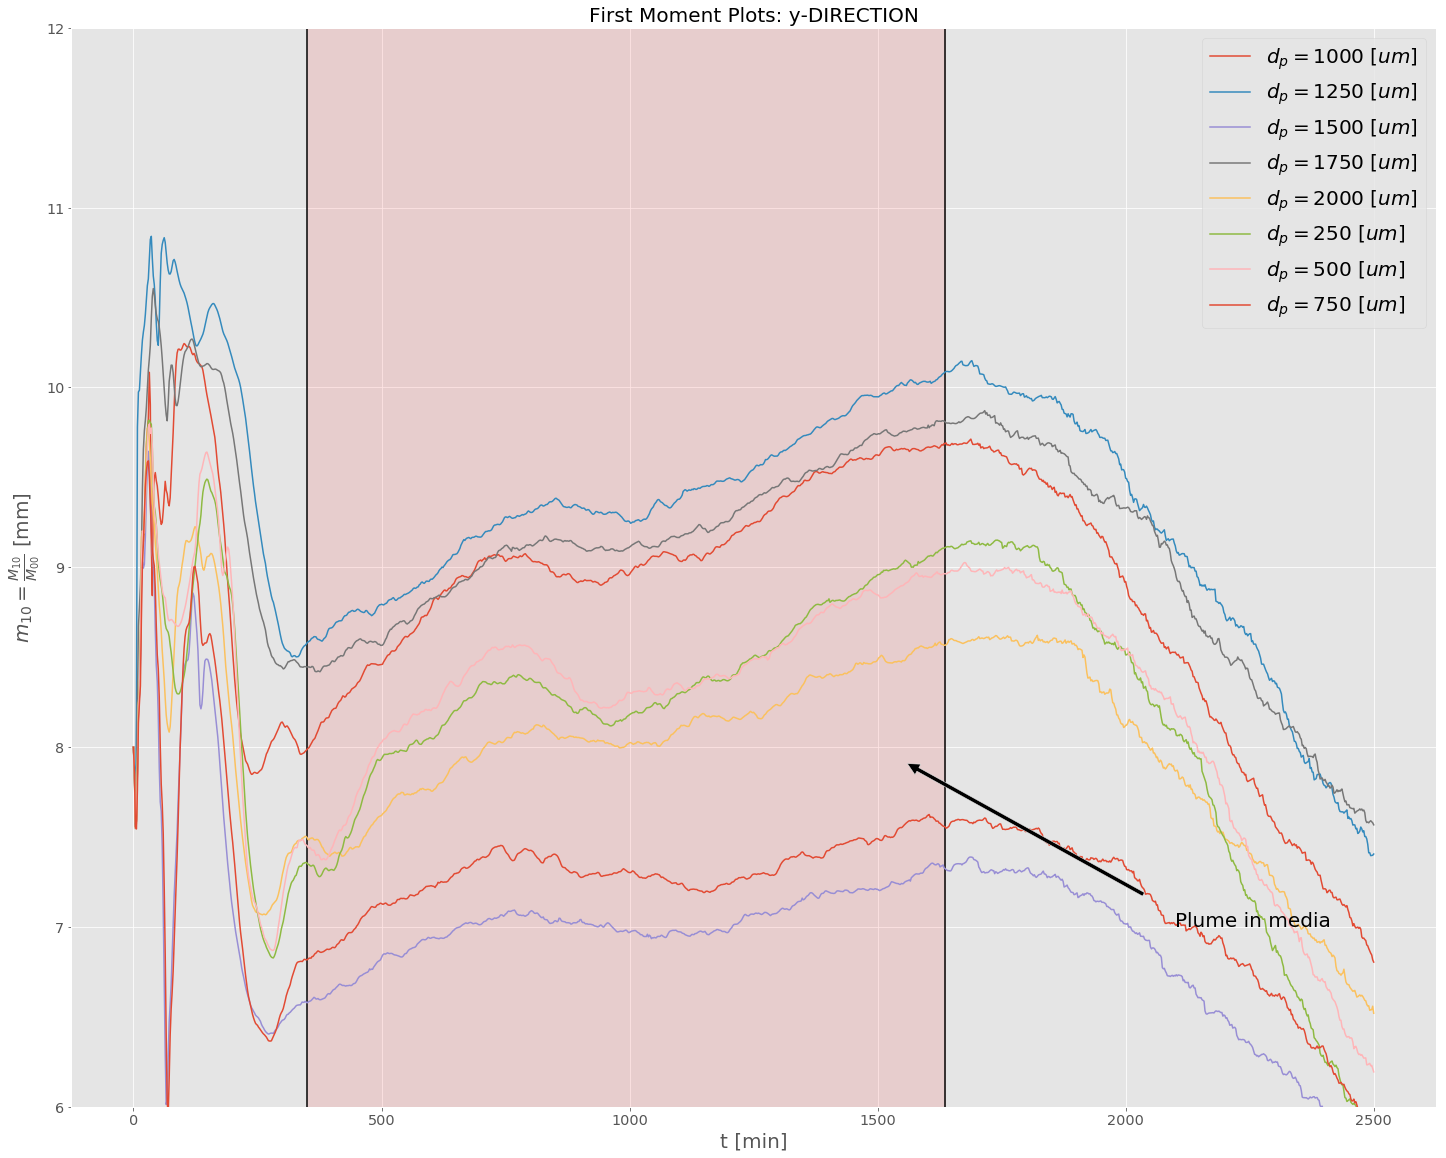

In [68]:
data_direction = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m1y/'


files = [data_direction+f for f in os.listdir(data_direction)]
files

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files]
diameters
fig, ax = plt.subplots()

for i, f in enumerate(files[:]):
    pd.read_csv(f,index_col=0).mean(axis=1).plot(label=r'$d_p=$'+diameters[i]+r' $[um]$',ax=ax)
plt.xlabel('t [min]', fontsize=20)
plt.ylabel(r'$m_{10}=\frac{M_{10}}{M_{00}}$ [mm]', fontsize=20)
plt.title(r'First Moment Plots: y-DIRECTION', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
ymax, ymin=12, 6
xmax, xmin=2500, 350
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=df.index[time_limit_ix])
plt.axvspan(xmin, df.index[time_limit_ix],  alpha=0.1, color='red')
plt.annotate('Plume in media', xy=(1500, 8), xytext=(2100, 7),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20);

In [69]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_mom_y.png')

In [2]:
folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1'

In [3]:
files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]


### the end of the media

In [4]:
L = .1 #mm

### particle diameter range [nm]

In [5]:
for f in files:
    print f.split('_')[1].split('.')[0]

250
500
750
1000
1250
1500
1750
2000


In [6]:
d =[int(f.split('_')[1].split('.')[0]) for f in files]

In [7]:
files_ = [folder + f for f in files]

In [8]:
def zero_moment(pos):
    m0 = []
    for t in range(pos.shape[1]):
        s = pos[t].dropna().shape[0]
        if s is None:
            m0.append(0)
        else:
            m0.append(s)
    return np.array(m0)

time = np.arange(0,4+1/500.,1/500.)

def mom(n, position, time, m0, norm=True):
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media for moment_{1} [m^{1}] @ time = {0} [min]".format(time[i],n))
            print("")
            break
        else:
            mn[i] = np.sum(position[i]**n)
    if norm:
        return mn/m0
    else:
        return mn

# First Moment

### x-direction

In [12]:
se = [1] #, 100, 142, 200, 1344]

files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]

d =[int(f.split('_')[1].split('.')[0]) for f in files]
m1xs = []
mos=[]
for f in files[:]:
    print(f)
    mosem = []
    m1em = []
    for s in se[:]:
        print s
        folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_' + str(s)+f
        par = particles.Particles(folder, dimension=2, time_start=0, time_end=4, time_step=500)
        x = par.qx[par.qx<0.1]
        m0 = zero_moment(x)
        m1x = mom(1, position = x, time=time, m0=m0, norm=True)
        m1em.append(m1x)
        mosem.append(m0)
    m1xs.append(m1em)
    mos.append(mosem)

/xy_250.txt
1
/xy_500.txt
1
/xy_750.txt
1
/xy_1000.txt
1
/xy_1250.txt
1
/xy_1500.txt
1
/xy_1750.txt
1
/xy_2000.txt
1


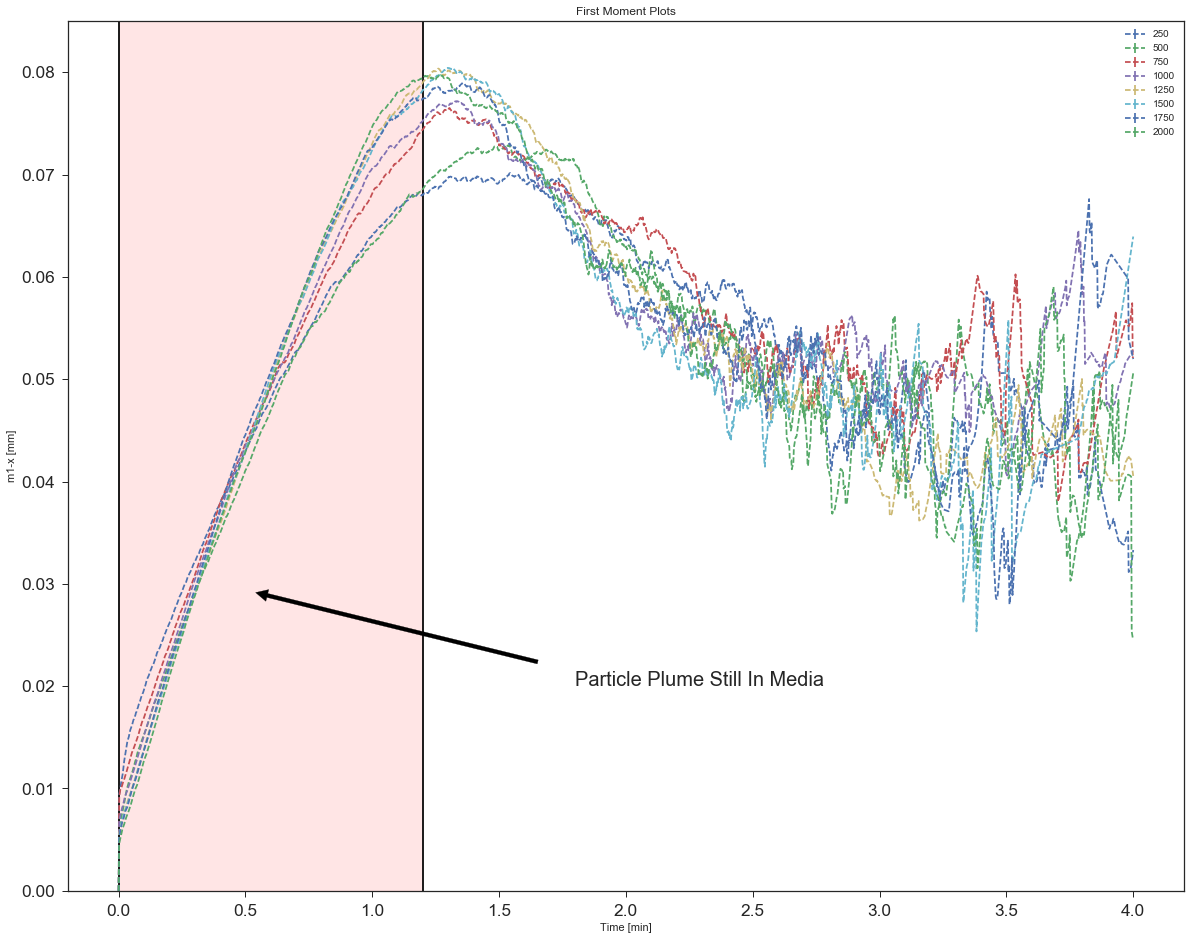

In [17]:
for i in range(len(m1xs)):
    y = np.array(m1xs[i]).mean(axis=0)
    x = time
    e = np.array(m1xs[i]).std(axis=0)
    plt.errorbar(x, y, yerr=e, fmt='--', label=str(d[i]))
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('m1-x [mm]')
plt.title('First Moment Plots');
ymax,ymin=0.085,0
xmax,xmin=1.2,0
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=xmax)
plt.axvspan(xmin, xmax,  alpha=0.1, color='red')
plt.annotate('Particle Plume Still In Media', xy=(.4, .03), xytext=(1.8, .02),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20)

In [ ]:
plt.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_mom_x.png')

In [33]:
np.where(time==1.2)

(array([600]),)

### y direction

#### example data

In [20]:
par = particles.Particles(files_[0], dimension=2, time_start=0, time_end=4, time_step=500)

/Users/georgepamfilis/PycharmProjects/compy/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


('first moment time t y direction', 0.027107407732776676)


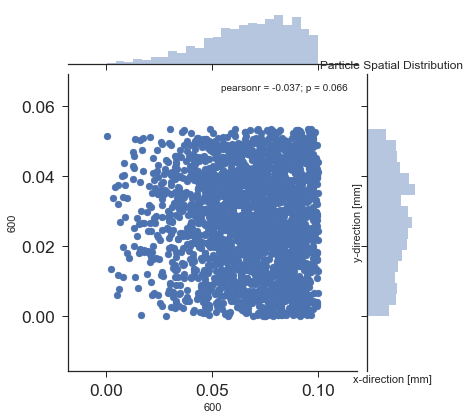

In [21]:
t = 600

x = par.qx[par.qx <.1]
y = par.qy[par.qx <.1]

sns.jointplot(x[t], y[t])
plt.xlabel('x-direction [mm]')
plt.ylabel('y-direction [mm]')
plt.title('Particle Spatial Distribution')
plt.legend()
print('first moment time t y direction',y[t].mean())

In [22]:
m0 = zero_moment(x)
m1y = mom(1, position = y, time=time, m0=m0, norm=True)

In [23]:
m1y[t]

0.027107407732776676

In [27]:
l_lim = 0
h_lim = 800
m1ys = []
m0s = []
for f in range(len(files_))[:1]:
    print(files_[f])
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=200)
    x = par.qx[par.qx<0.1]
    y = par.qy[par.qx<0.1]
    m0 = zero_moment(x)
    m1y = mom(1, position = y, time=time, m0=m0, norm=True)
    m1ys.append(m1y)
    m0s.append(m0)

/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt


0.0271074077328


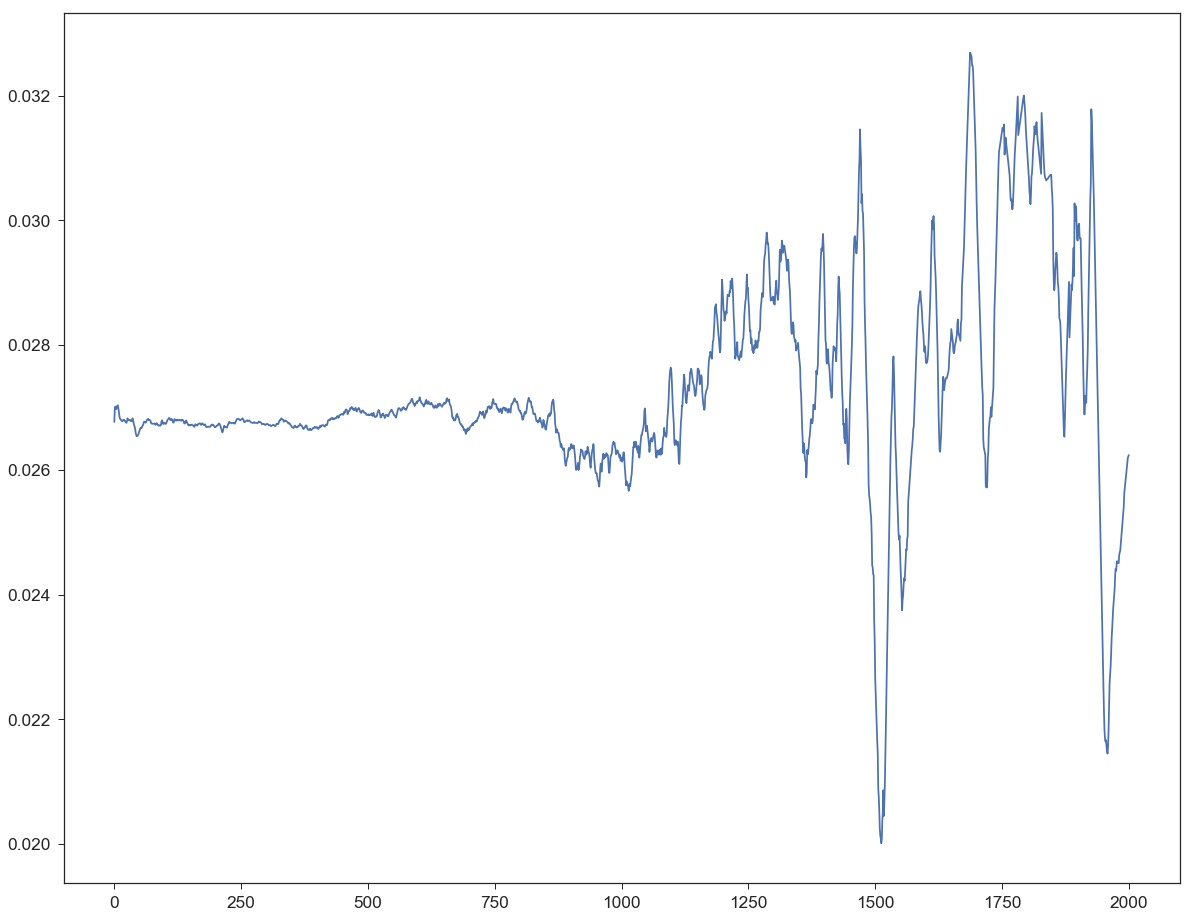

In [28]:
plt.plot(m1ys[0])
print(m1ys[0][t])

(4000, 2001)

### plot all

/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1000.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_2000.txt


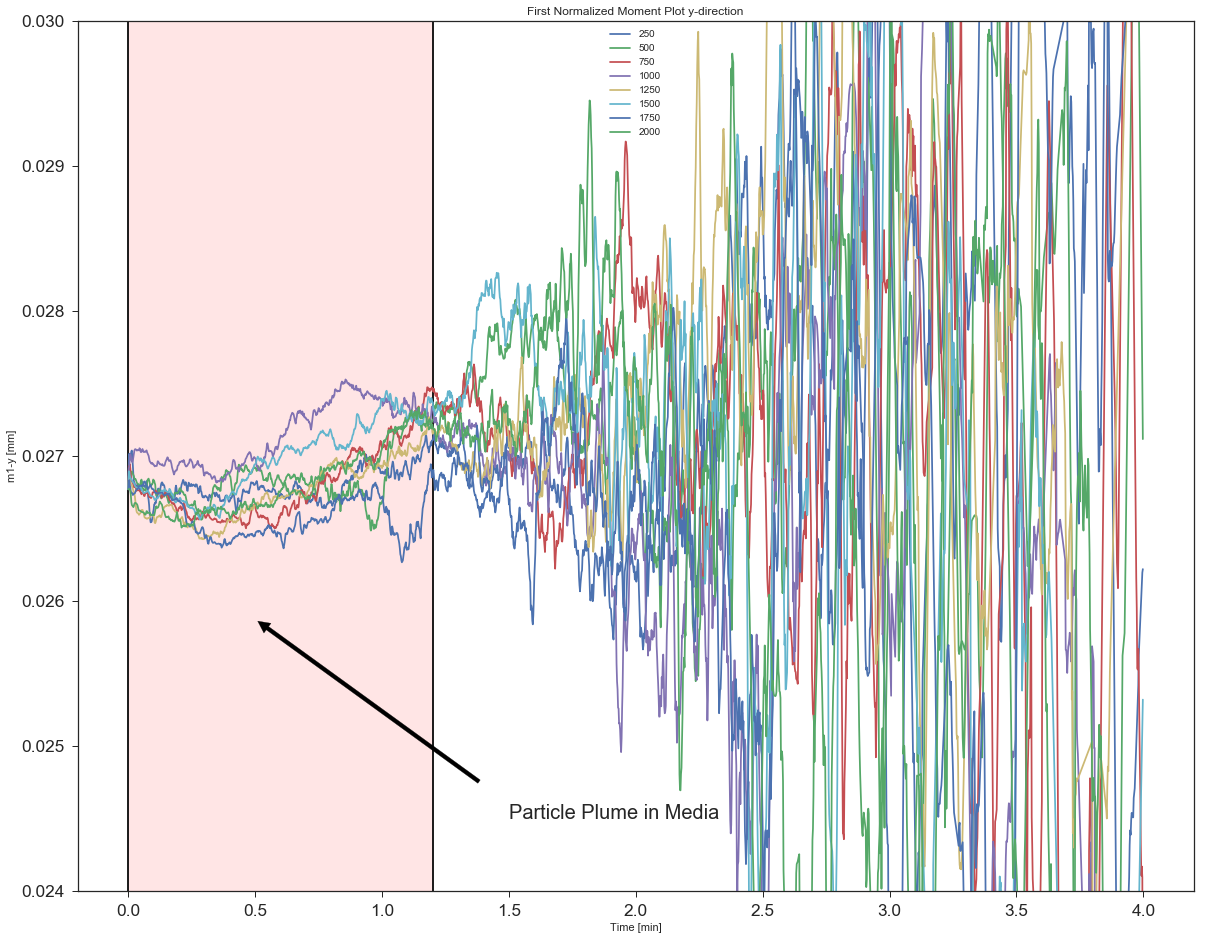

In [32]:
l_lim = 0
h_lim = 2000
m1ys = []
m0s = []
for f in range(len(files_))[:]:
    print(files_[f])
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=500)
    x = par.qx[par.qx<0.1]
    y = par.qy[par.qx<0.1]
    m0 = zero_moment(x)
    m1y = mom(1, position = y, time=time, m0=m0, norm=True)
    m1ys.append(m1y)
    m0s.append(m0)
    plt.plot(time[l_lim:h_lim], m1y[l_lim:h_lim], label=d[f])
plt.xlabel('Time [min]')
plt.ylabel('m1-y [mm]')
plt.title('First Normalized Moment Plot y-direction')
plt.legend();
ymax,ymin=0.03,0.024
xmax,xmin=1.2,0
plt.ylim(ymin,ymax)
plt.vlines(ymax=ymax,ymin=ymin,colors='black', x=xmin)
plt.vlines(ymax=ymax,ymin=ymin,colors='black',x=xmax)
plt.axvspan(xmin, xmax,  alpha=0.1, color='red')
plt.annotate('Particle Plume in Media', xy=(.4, .026), xytext=(1.5, .0245),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20)

# NOT TESTED BUT NECECERRY

### plot all with seeds

In [105]:
se = [1]#, 100,142,200,1344,10000]

files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]

d =[int(f.split('_')[1].split('.')[0]) for f in files]
m1xs = []
mos=[]
for f in files[:1]:
    print f
    mosem = []
    m1em = []
    for s in se[:]:
        print s
        folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_'+str(s)+f
        par = particles.Particles(folder, dimension=2, time_start=0, time_end=4, time_step=200)
        m0 = zero_moment(par.qx)
        y = par.qy[par.qx<.1].dropna()
        m1x = mom(1, position = y, time=time, m0=m0, norm=True)
        m1em.append(m1x)
        mosem.append(m0)
    m1xs.append(m1em)
    mos.append(mosem)


/xy_250.txt
1


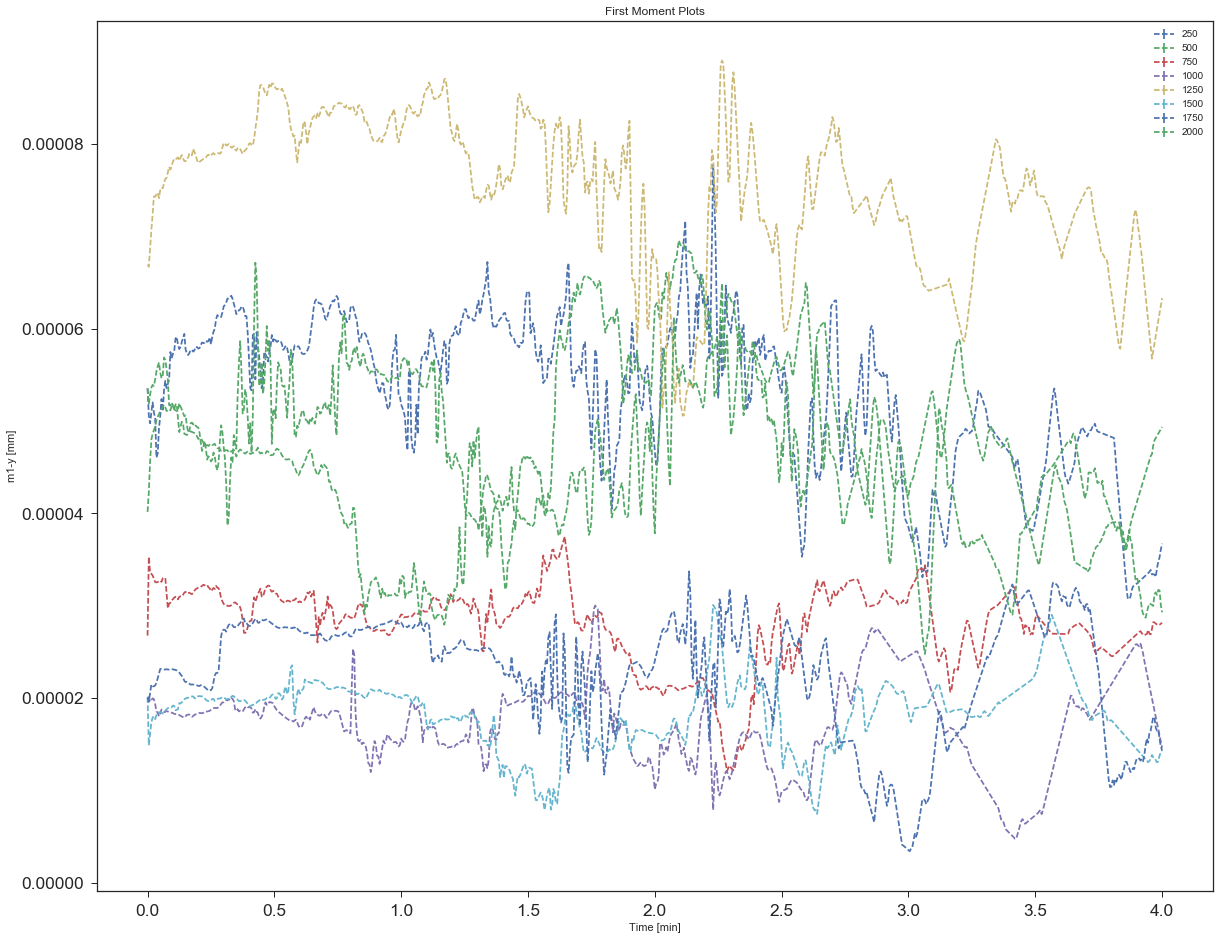

In [98]:
for i in range(len(m1xs)):
    y = np.array(m1xs[i]).mean(axis=0)
    x = time
    e = np.array(m1xs[i]).std(axis=0)
    plt.errorbar(x, y, yerr=e, fmt='--', label=str(d[i]))
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('m1-y [mm]')
plt.title('First Moment Plots');

In [ ]:
plt.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_mom_y.png')

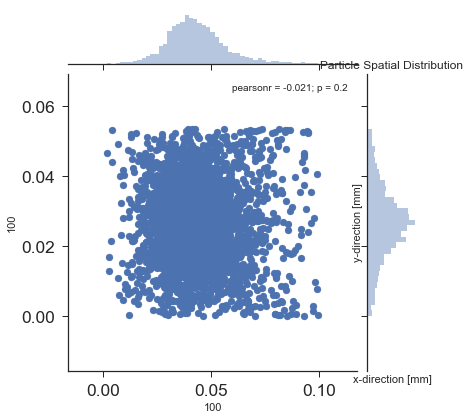

In [93]:
t = 100
x,y = par.qx[par.qx<.1], par.qy[par.qx <.1]
sns.jointplot(x[t], y[t])
plt.xlabel('x-direction [mm]')
plt.ylabel('y-direction [mm]')
plt.title('Particle Spatial Distribution')
plt.legend()

In [96]:
y[t].mean()

0.026456083704786752

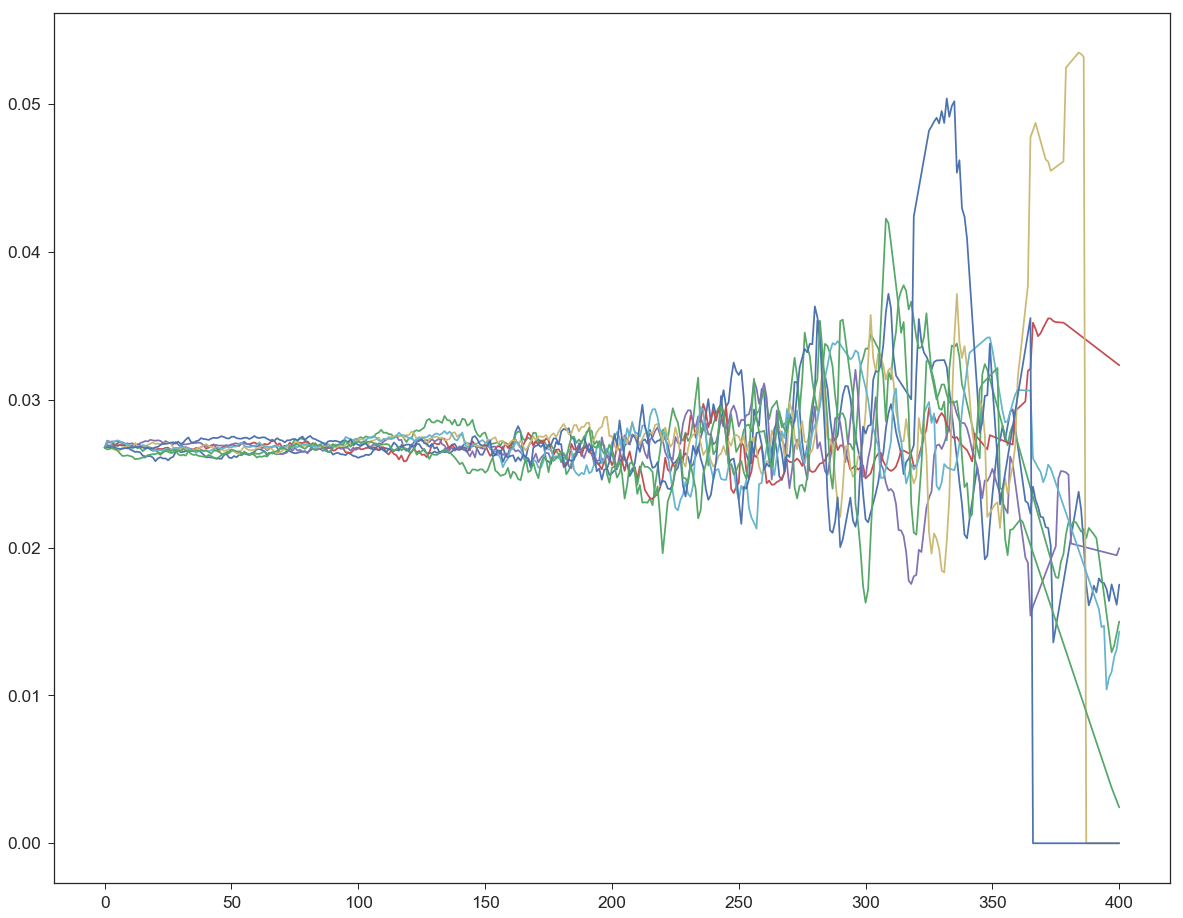

In [163]:
for s in sy1:
    plt.plot(s)

In [196]:
par = particles.Particles(files_[0], dimension=2, time_start=0, time_end=4, time_step=100)


In [199]:
x = par.qx[par.qx<0.1]

3

In [185]:
y = par.qy#[par.qx<0.1]
y.shape

(1000, 401)

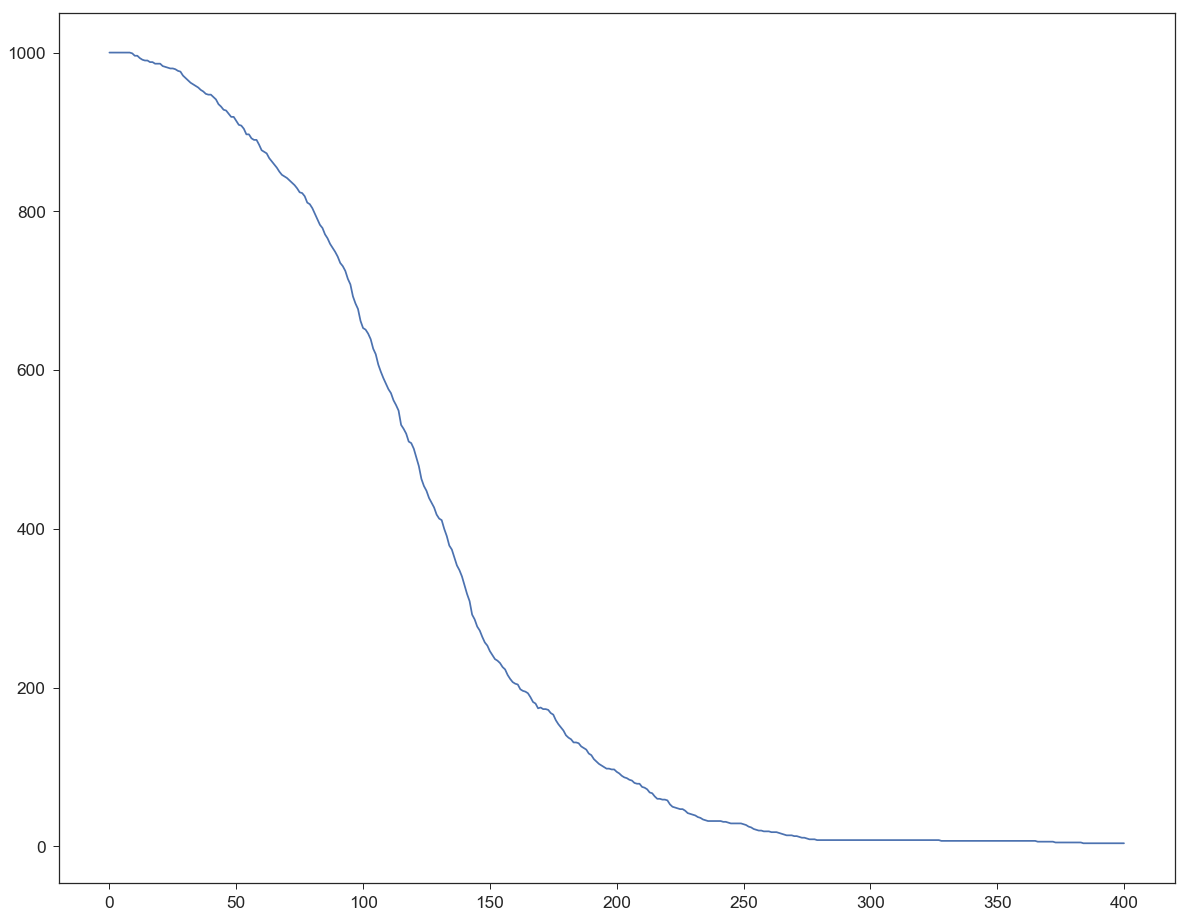

In [23]:
m1x = momn(1, position = par.qx[par.qx<0.1], time=time, m0=m0, norm=False)

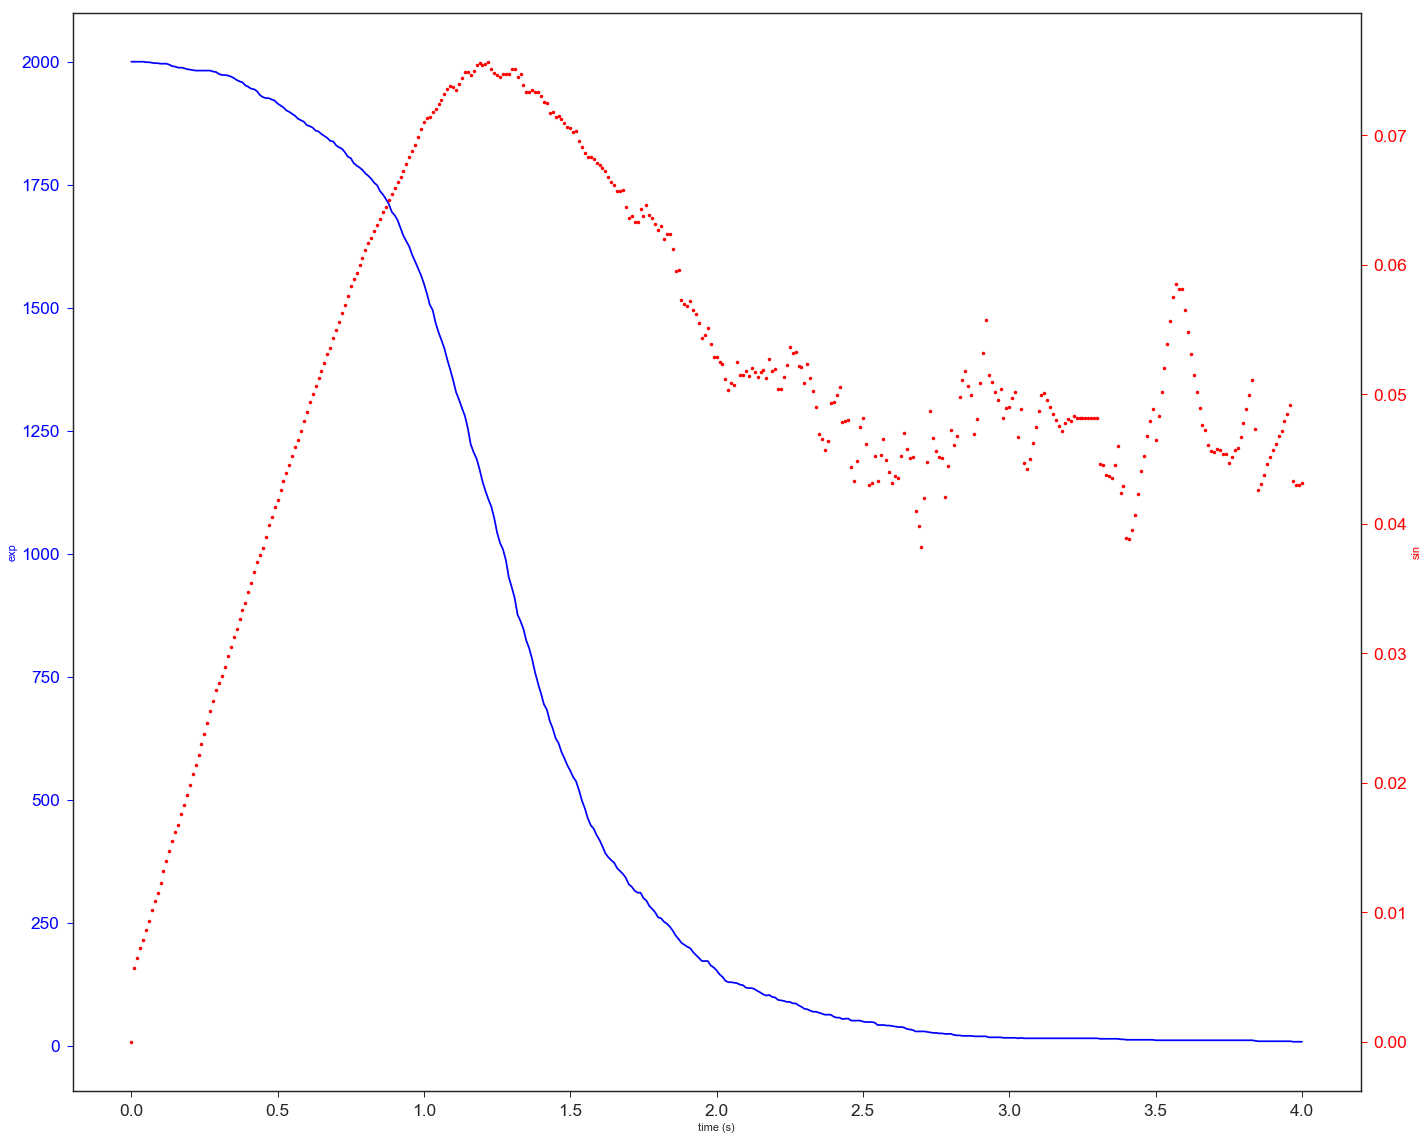

In [27]:
fig, ax1 = plt.subplots()
t = time
s1 = m0
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')
m1x = momn(1, position = par.qx[par.qx<0.1], time=time, m0=m0, norm=True)
ax2 = ax1.twinx()
s2 = m1x
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()

In [316]:
x[t].dropna().mean()

0.10339780000998069

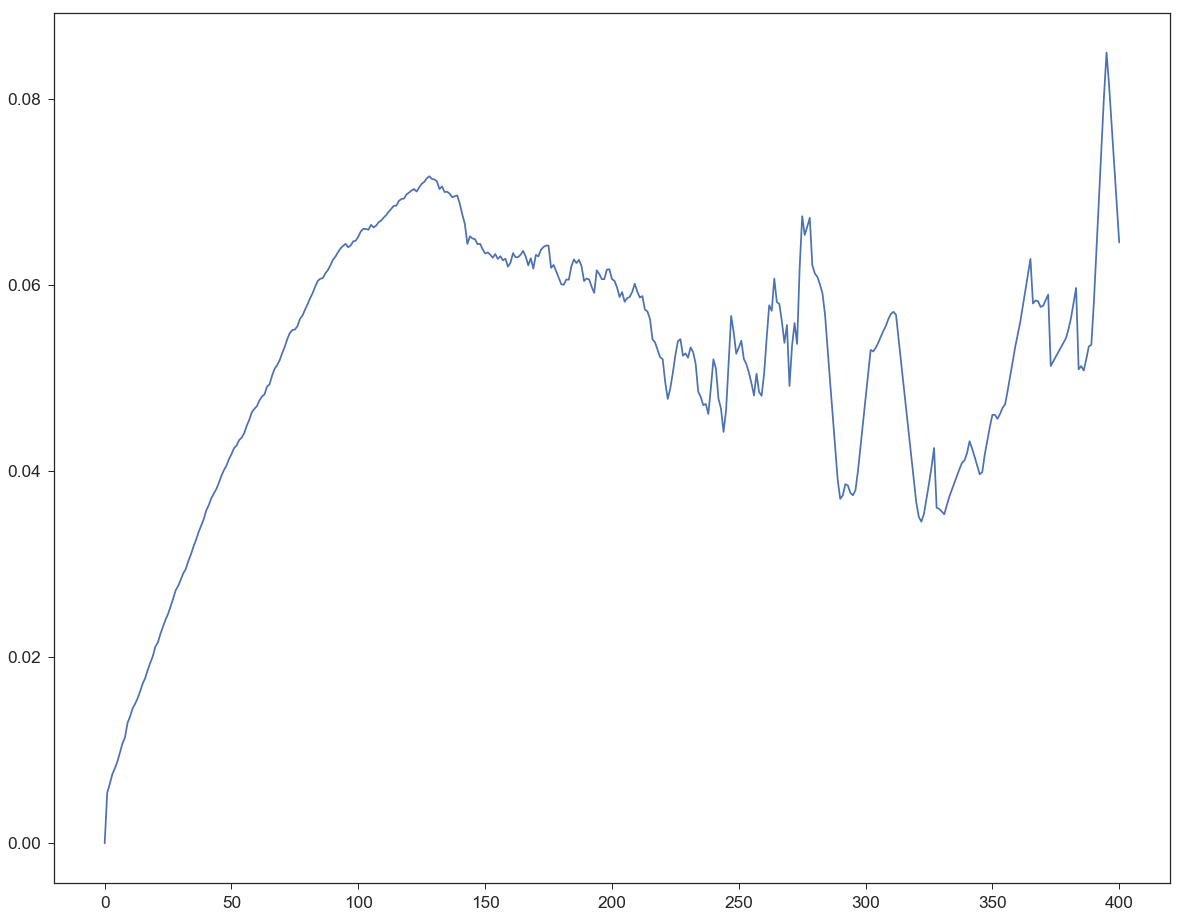

In [317]:
plt.plot(m1x)

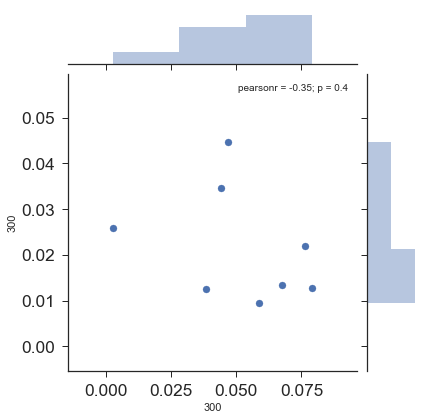

In [187]:
par = particles.Particles(files_[0], dimension=2, time_start=0, time_end=4, time_step=100)
m0 = zero_moment(par.qx)
m1x = mom(1, position = par.qx, time=time, m0=m0, norm=True)

In [190]:
m0

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 10

In [181]:
t = 300

In [182]:
x[t].dropna().mean()

0.05177306351407672

In [175]:
y[t]

0      0.006848
1      0.048342
2      0.041414
3      0.047123
4      0.031338
5      0.027769
6      0.025797
7      0.049275
8      0.005720
9      0.003722
10     0.041411
11     0.028043
12     0.033205
13     0.023774
14     0.016649
15     0.001117
16     0.036360
17     0.002232
18     0.012618
19     0.049305
20     0.038798
21     0.014802
22     0.033942
23     0.025830
24     0.047434
25     0.033401
26     0.016566
27     0.037428
28     0.019326
29     0.035440
         ...   
970    0.002690
971    0.023363
972    0.002374
973    0.011743
974    0.038085
975    0.047925
976    0.049437
977    0.025859
978    0.002621
979    0.024061
980    0.000917
981    0.045630
982    0.024233
983    0.037231
984    0.033713
985    0.005852
986    0.013624
987    0.032839
988    0.016559
989    0.039861
990    0.010740
991    0.046136
992    0.019818
993    0.028239
994    0.006470
995    0.020578
996    0.024781
997    0.012512
998    0.027349
999    0.023725
Name: 300, dtype: float6

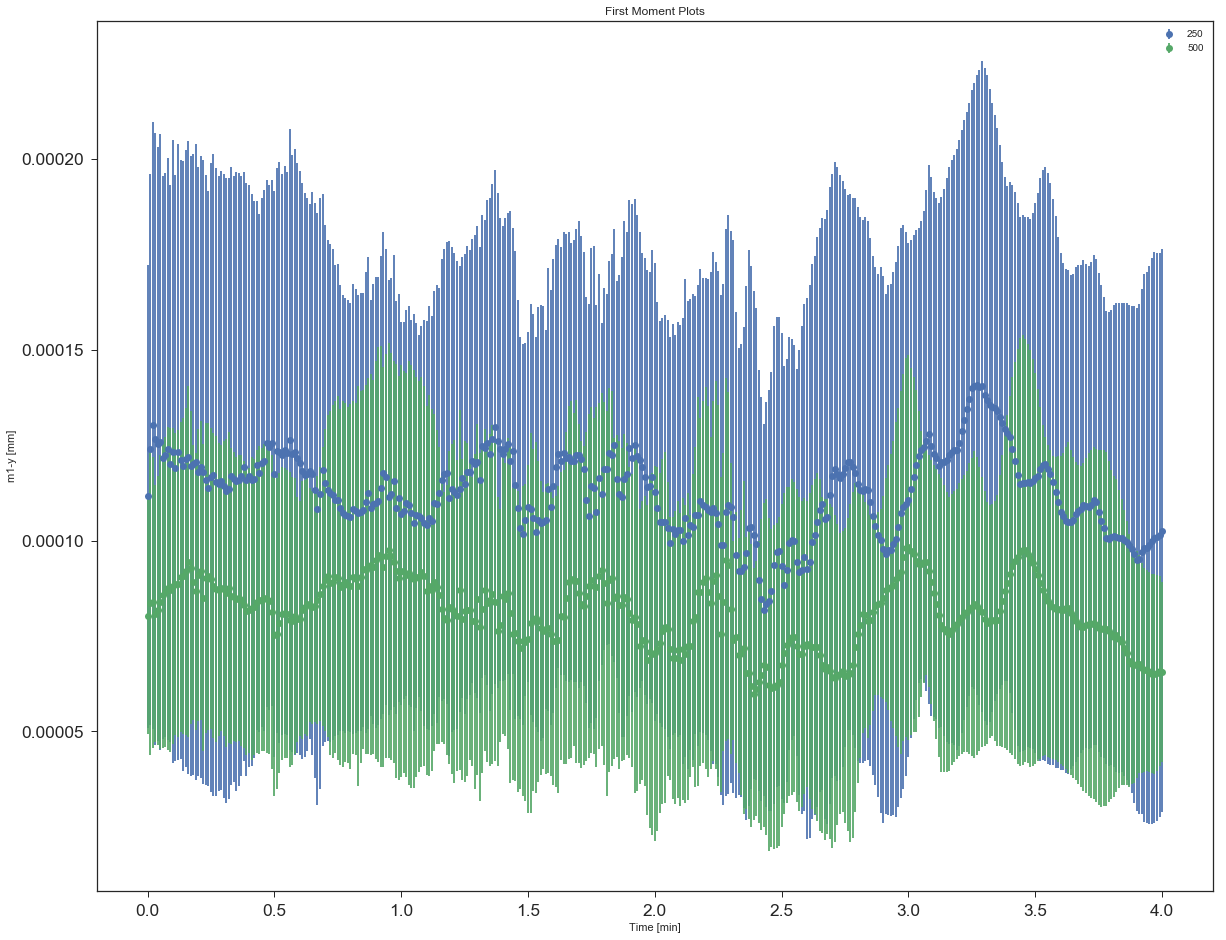

In [154]:
for i in range(len(m1xs)):
    y = np.array(m1xs[i]).mean(axis=0)
    x = time
    e = np.array(m1xs[i]).std(axis=0)
    plt.errorbar(x, y, yerr=e, fmt='o', label=str(d[i]))
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('m1-y [mm]')
plt.title('First Moment Plots')
# plt.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_mom_y.png')

AttributeError: 'NoneType' object has no attribute 'legendHandles'

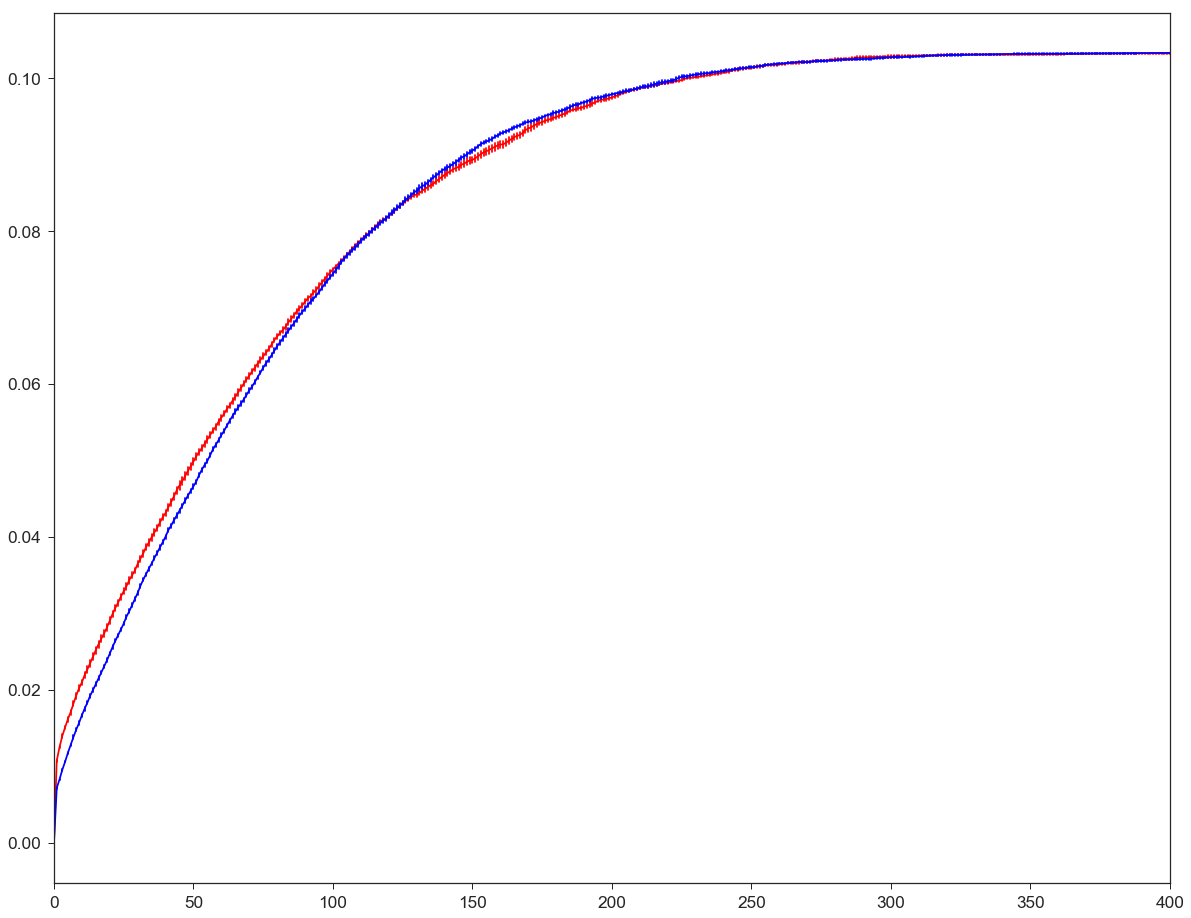

In [111]:
fig, ax = plt.subplots()
sns.tsplot(data=m1xs[0],ax=ax, err_style="ci_bars", color=colors[0])
sns.tsplot(data=m1xs[1],ax=ax, err_style="ci_bars", color=colors[1])

leg = ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('yellow')

TypeError: __init__() got an unexpected keyword argument 'colors'

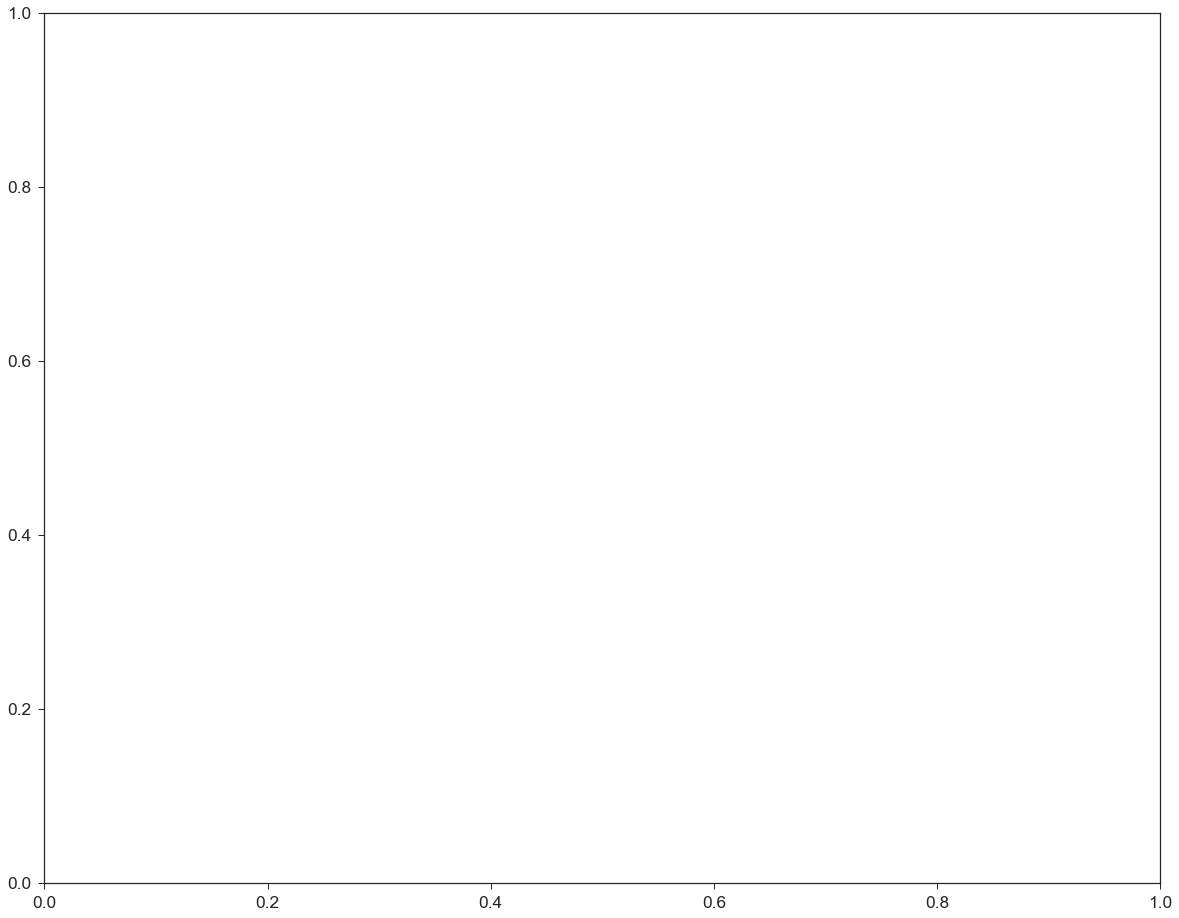

In [102]:

plt.legend([str(i) for i in d[:2]], loc="best", colors=colors)

In [35]:
df3 = pd.concat([pd.DataFrame(m0s[i], columns=['m0_'+str(d[i])]) for i in range(len(m0s))], axis=1)
df3.index = time
df3.to_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/0_moments_y.csv')

In [36]:
df4 = pd.concat([pd.DataFrame(m1ys[i], columns=['m1y_'+str(d[i])]) for i in range(len(m1xs))], axis=1)
df4.index = time
df4.to_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_moments_y.csv')

##### Userfull Links